In [6]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt

## Helper Functions

In [7]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

# PPO parameter dependency

## clip for K=10

In [16]:
rewards10 = {}
env_name = "LunarLander-v2"
epsilons = [0.01,0.1,0.2,0.5,0.75]
k=10

for eps in epsilons:
    with open(f"./results/PPO_{env_name}-eps{eps}-k{k}-sNone-stat.pkl", 'rb') as f:
        data = pickle.load(f)
        rewards10[data["eps"]] = data["rewards"]

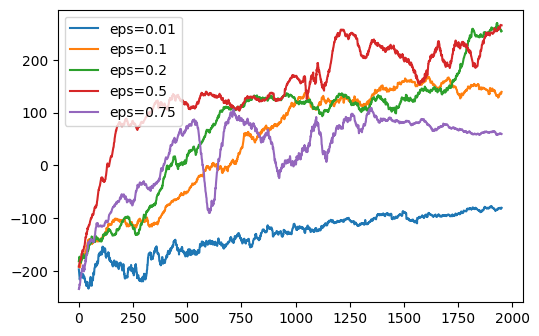

In [17]:
fig=plt.figure(figsize=(6,3.8))
for eps,rew in rewards10.items():
    plt.plot(running_mean(rew,50),label=f"eps={eps}")
plt.legend()

In [18]:
fig.savefig(f"PPO_{env_name}_effect_clipping-k10.pdf")

## restarts for k=10 and eps=0.2

In [27]:
rewards_s = {}
env_name = "LunarLander-v2"
eps = 0.2
k=10
ss=[0,1,2,3,4]

for s in ss:
    with open(f"./results/PPO_{env_name}-eps{eps}-k{k}-s{s}-stat.pkl", 'rb') as f:
        data = pickle.load(f)
        rewards_s[s] = data["rewards"]

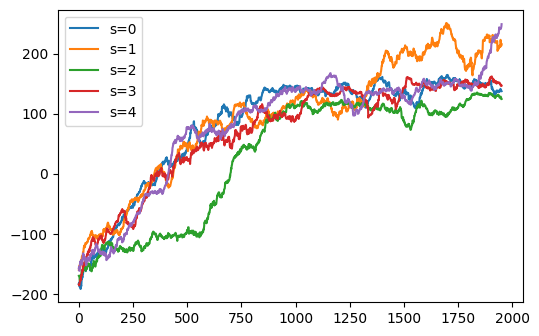

In [28]:
fig=plt.figure(figsize=(6,3.8))
for s,rew in rewards_s.items():
    plt.plot(running_mean(rew,50),label=f"s={s}")
plt.legend()

In [29]:
fig.savefig(f"PPO_{env_name}_effect_restart-k10.pdf")

## clip for K=4

In [20]:
rewards = {}
env_name = "LunarLander-v2"
epsilons = [0.01,0.1,0.2,0.5,0.75]
k=4

for eps in epsilons:
    with open(f"./results/PPO_{env_name}-eps{eps}-k{k}-sNone-stat.pkl", 'rb') as f:
        data = pickle.load(f)
        rewards[data["eps"]] = data["rewards"]

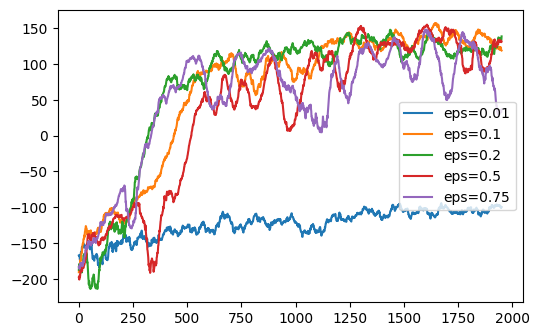

In [21]:
fig=plt.figure(figsize=(6,3.8))
for eps,rew in rewards.items():
    plt.plot(running_mean(rew,50),label=f"eps={eps}")
plt.legend()

In [22]:
fig.savefig(f"PPO_{env_name}_effect_clipping-k4.pdf")